In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Table cleaning

In [3]:
data = pd.read_csv('/home/maligina/data/train_split_fluor.csv')
data = data.rename(columns={'Absorption max (nm)' : 'Absorption_max_nm', "Emission max (nm)": "Emission_max_nm", "Quantum yield": "Quantum_yield", 'Stokes shift':'Stokes_shift'})
print('pearson =', data['Absorption_max_nm'].corr(data['Emission_max_nm']))
print('spearman =', data['Absorption_max_nm'].corr(data['Emission_max_nm'], method = 'spearman'))

pearson = 0.8616192242328242
spearman = 0.840341688811574


In [4]:
data[['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield', 'Stokes_shift', 'Lifetime (ns)', 'Molecular weight (g mol-1)']].corr(method = 'spearman')

,Absorption_max_nm,Emission_max_nm,Quantum_yield,Stokes_shift,Lifetime (ns),Molecular weight (g mol-1)
Absorption_max_nm,1.000000,0.840342,0.055636,-0.265575,0.026356,0.386295
Emission_max_nm,0.840342,1.000000,-0.085089,0.209451,-0.015456,0.335008
Quantum_yield,0.055636,-0.085089,1.000000,-0.225972,0.403750,0.175402
Stokes_shift,-0.265575,0.209451,-0.225972,1.000000,-0.046143,-0.064706
Lifetime (ns),0.026356,-0.015456,0.403750,-0.046143,1.000000,-0.062479
Molecular weight (g mol-1),0.386295,0.335008,0.175402,-0.064706,-0.062479,1.000000


In [5]:
data.head(3)

,Unnamed: 0,Tag,Chromophore,Solvent,Absorption_max_nm,Emission_max_nm,Lifetime (ns),Quantum_yield,log(e/mol-1 dm3 cm-1),abs FWHM (cm-1),emi FWHM (cm-1),abs FWHM (nm),emi FWHM (nm),Molecular weight (g mol-1),Reference,Stokes_shift
0,0,1,N#Cc1cc2ccc(O)cc2oc1=O,O,355.0,410.0,2.804262,NaN,NaN,NaN,NaN,NaN,NaN,187.15370,DOI: 10.1021/acs.jpcb.5b09905,55.0
1,1,2,N#Cc1cc2ccc([O-])cc2oc1=O,O,408.0,450.0,3.961965,NaN,NaN,NaN,NaN,NaN,43.0,186.14576,DOI: 10.1021/acs.jpcb.5b09905,42.0
2,2,3,CCCCCCCCCCCC#CC#CCCCCCCCCCN1C(=O)c2ccc3c4ccc5c...,ClC(Cl)Cl,526.0,535.0,3.602954,NaN,NaN,NaN,NaN,NaN,NaN,1061.54348,https://doi.org/10.1002/smll.201901342,9.0


In [6]:
print(data.isna().sum())

Unnamed: 0                        0
Tag                               0
Chromophore                       0
Solvent                           0
Absorption_max_nm              2737
Emission_max_nm                1919
Lifetime (ns)                 12103
Quantum_yield                  5848
log(e/mol-1 dm3 cm-1)         11135
abs FWHM (cm-1)               17702
emi FWHM (cm-1)               17820
abs FWHM (nm)                 15147
emi FWHM (nm)                 11850
Molecular weight (g mol-1)        0
Reference                         0
Stokes_shift                   3906
dtype: int64


In [7]:
Q1 = data['Molecular weight (g mol-1)'].quantile(0.25)
Q3 = data['Molecular weight (g mol-1)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR #тут примерно 941.3
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['Molecular weight (g mol-1)'] < lower_bound) | (data['Molecular weight (g mol-1)'] > upper_bound)]
print(f"Number of outliers using IQR method: {len(outliers_iqr)}")

data = data[(data['Molecular weight (g mol-1)'] >= lower_bound) & (data['Molecular weight (g mol-1)'] <= upper_bound)]
data.shape

Number of outliers using IQR method: 908


(17478, 16)

In [8]:
data = data[data['Stokes_shift'] >= 0]
data.shape

(13769, 16)

In [9]:
data_dropped = data.dropna(subset=['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield']).reset_index(drop=True)
print(data_dropped.shape)
print(data_dropped.isna().sum())

(10341, 16)
Unnamed: 0                       0
Tag                              0
Chromophore                      0
Solvent                          0
Absorption_max_nm                0
Emission_max_nm                  0
Lifetime (ns)                 5723
Quantum_yield                    0
log(e/mol-1 dm3 cm-1)         4758
abs FWHM (cm-1)               9904
emi FWHM (cm-1)               9928
abs FWHM (nm)                 7994
emi FWHM (nm)                 6381
Molecular weight (g mol-1)       0
Reference                        0
Stokes_shift                     0
dtype: int64


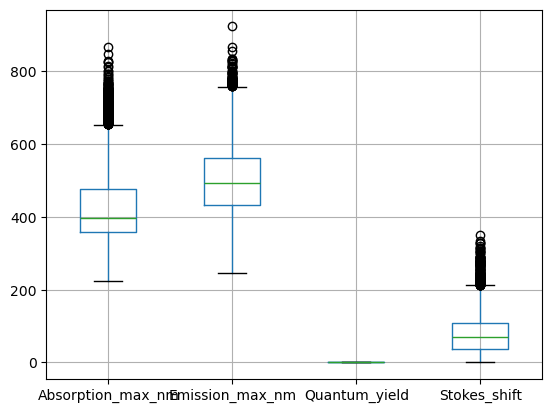

In [11]:
# data_dropped.hist(column=['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield', 'Stokes_shift'])
data_dropped.boxplot(column=['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield', 'Stokes_shift'])
plt.show()

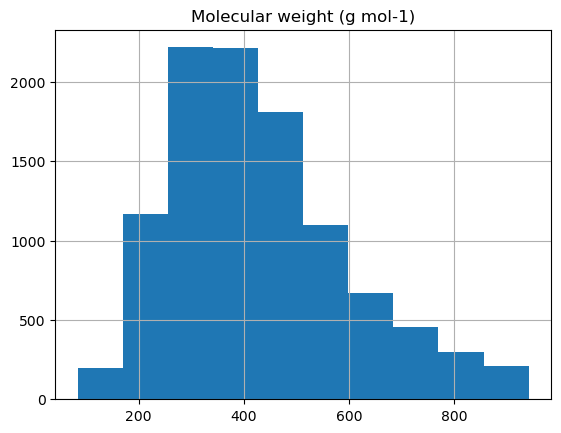

In [12]:
data_dropped.hist(column=['Molecular weight (g mol-1)'])
plt.show()

In [13]:
X = data_dropped[['Chromophore', 'Solvent']]
X.head(3)

,Chromophore,Solvent
0,O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...,O
1,O=C([O-])c1ccccc1-c1c2cc(I)c(=O)c(I)c-2oc2c(I)...,O
2,O=C([O-])c1ccccc1-c1c2cc(I)c(=O)c(I)c-2oc2c(I)...,CO


In [14]:
y = data_dropped[['Absorption_max_nm', 'Quantum_yield', 'Stokes_shift']]
y['Absorption_max_nm'] = np.log10(y['Absorption_max_nm'])
y.head(3)

/tmp/ipykernel_599636/297302290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Absorption_max_nm'] = np.log10(y['Absorption_max_nm'])


,Absorption_max_nm,Quantum_yield,Stokes_shift
0,2.711807,0.20,23.0
1,2.716838,0.02,13.0
2,2.720986,0.08,19.0


In [15]:
# data_dropped.to_csv('/home/maligina/data/train_clean.csv')

# Database preparation

In [2]:
data_dropped = pd.read_csv('/home/maligina/data/train_clean.csv')
# data_dropped.head(3)

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms
from ase.db import connect
from rdkit.Chem import rdForceFieldHelpers

In [11]:
# # Connect to the existing database
# db_old = connect('solvent.db')
# # Create a new database to store filtered molecules
# db_new = connect('filtered_solvent.db')

# # Iterate through the existing database
# for row in db_old.select():
#     atoms = row.toatoms()
    
#     # Check if iodine (atomic number 53) is present
#     if 53 not in atoms.get_atomic_numbers():
#         # Write the entry to the new database
#         db_new.write(atoms, key_value_pairs=row.key_value_pairs)
# print(len(db_new))

263


In [6]:
# # Connect to the existing database
# db_old = connect('chromophore.db')
# # Create a new database to store filtered molecules
# db_new = connect('filtered_chromophore.db')

# # Iterate through the existing database
# for row in db_old.select():
#     atoms = row.toatoms()
    
#     # Check if iodine (atomic number 53) is present
#     if 53 not in atoms.get_atomic_numbers():
#         # Write the entry to the new database
#         db_new.write(atoms, key_value_pairs=row.key_value_pairs)
# print(len(db_new))

4391


In [48]:
def smiles_to_ase(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Embed with multiple attempts to handle difficult molecules
    try:
        AllChem.EmbedMolecule(mol, maxAttempts=1000)
        # ff = rdForceFieldHelpers.UFFGetMoleculeForceField(mol)
        # print(f'Energy for {smiles} before: {ff.CalcEnergy()}')
        AllChem.UFFOptimizeMolecule(mol, maxIters=10000)
        # ff = rdForceFieldHelpers.UFFGetMoleculeForceField(mol)
        # print(f'Energy after: {ff.CalcEnergy()}')
    except ValueError:
        print(f"Failed to generate 3D conformer for SMILES: {smiles}")
        return None
    
    conformer = mol.GetConformer()
    positions = []
    symbols = []
    
    for atom in mol.GetAtoms():
        pos = conformer.GetAtomPosition(atom.GetIdx())
        positions.append((pos.x, pos.y, pos.z))
        symbols.append(atom.GetSymbol())
    
    return Atoms(symbols=symbols, positions=positions)

In [7]:
# Second version of code

def smiles_to_ase(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Embed with multiple attempts to handle difficult molecules
    try:
        AllChem.EmbedMolecule(mol, maxAttempts=1000)
        AllChem.UFFOptimizeMolecule(mol, maxIters=10000)
        
        # # Check if conformer was successfully generated
        # if mol.GetNumConformers() == 0:
        #     raise ValueError("Conformer generation failed")
        
    except ValueError as e:
        print(f"Failed to generate 3D conformer for SMILES: {smiles}, Error: {str(e)}")
        return None
    
    conformer = mol.GetConformer()
    positions = []
    symbols = []
    
    for atom in mol.GetAtoms():
        pos = conformer.GetAtomPosition(atom.GetIdx())
        positions.append((pos.x, pos.y, pos.z))
        symbols.append(atom.GetSymbol())
    
    # # Check if symbols list is populated
    # if not symbols:
    #     print(f"No valid atomic symbols for SMILES: {smiles}")
    #     return None
    
    return Atoms(symbols=symbols, positions=positions)

# Connect to (or create) databases
db_chromophore = connect('chromophore.db')
db_solvent = connect('solvent.db')

# Usage with unique chromophores and solvents
unique_chromophores = data_dropped['Chromophore'].unique()
unique_solvents = data_dropped['Solvent'].unique()

# Iterate over chromophores
for smiles in unique_chromophores:
    chromophore_ase = smiles_to_ase(smiles)

    if chromophore_ase:
        db_chromophore.write(chromophore_ase, smiles=smiles)

# Iterate over solvents
for smiles in unique_solvents:
    solvent_ase = smiles_to_ase(smiles)
    
    if solvent_ase:
        db_solvent.write(solvent_ase, smiles=smiles)


Failed to generate 3D conformer for SMILES: COCCOCCOCCNc1cc2c3c(c(NCCOCCOCCOC)cc4c3c1C(=O)N(CCOCCOCCOC)C4=O)C(=O)N(CCOCCOCCOC)C2=O, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc([Si](C)(C)C)cc3)ccc2-c2ccc(-c3ccc([Si](C)(C)C)cc3)cc21, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1, Error: Bad Conformer Id


[07:28:04] UFFTYPER: Warning: hybridization set to SP3 for atom 4
[07:28:04] UFFTYPER: Warning: hybridization set to SP3 for atom 4
[07:28:04] UFFTYPER: Unrecognized charge state for atom: 1
[07:28:04] UFFTYPER: Unrecognized charge state for atom: 1
[07:28:04] UFFTYPER: Unrecognized charge state for atom: 1
[07:28:04] UFFTYPER: Unrecognized charge state for atom: 1
[07:28:04] UFFTYPER: Unrecognized charge state for atom: 1
[07:28:04] UFFTYPER: Unrecognized charge state for atom: 1


Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCCCCCOc1cc(C#Cc2ccc3ccccc3c2)c(OCCCCCCCCCCCCCCCC)cc1C#Cc1ccc(C=C(C#N)C#N)cc1, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCCCOc1cc(OCCCCCCCCCC)cc(C2=C3C(C)=CC(/C=C/c4ccc(OC)cc4)=[N+]3[B-](F)(F)n3c(/C=C/c4ccc(OC)cc4)cc(C)c32)c1, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)ccc2-c2ccc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)cc21, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: C(=C/c1cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)c1)\c1ccc(-n2c3ccccc3c3ccccc32)cc1, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: c12c3c4c5c1c1c6c7c2c2c8c3c3c9c4c4c%10c5c5c1c1c6c6c%11c%12c%13c%14c%15c%16c%17c%14c%14c%18c%13c%11c1c1c5c%10c5c(c%14c%10c%17c%11c%13c%16c%14c%16c%15c%12c%12c%16c(c2c7c%126)c2c8c3c(c%13c%142)c2c9c4c5c%10c%112)c%181, Error: Bad Conformer Id


[07:32:03] UFFTYPER: Unrecognized atom type: Se2+2 (16)
[07:32:03] UFFTYPER: Unrecognized atom type: Se2+2 (33)
[07:32:03] UFFTYPER: Unrecognized atom type: Se2+2 (50)
[07:32:03] UFFTYPER: Unrecognized atom type: Se2+2 (16)
[07:32:03] UFFTYPER: Unrecognized atom type: Se2+2 (33)
[07:32:03] UFFTYPER: Unrecognized atom type: Se2+2 (50)
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 5
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 5
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 7
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 7
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 6
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 6
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 9
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 9
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 8
[07:32:09] UFFTYPER: Warning: hybridization set to SP3 for atom 8


Failed to generate 3D conformer for SMILES: C(=C1c2ccccc2CCc2ccccc21)c1ccc(-c2cc(-c3ccc(C=C4c5ccccc5CCc5ccccc54)cc3)cc(-c3ccc(C=C4c5ccccc5CCc5ccccc54)cc3)c2)cc1, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: C(=C(c1ccccc1)c1ccccc1)c1ccc(-c2cc(-c3ccc(C=C(c4ccccc4)c4ccccc4)cc3)cc(-c3ccc(C=C(c4ccccc4)c4ccccc4)cc3)c2)cc1, Error: Bad Conformer Id


[07:33:22] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:22] UFFTYPER: Unrecognized charge state for atom: 1
[07:33:22] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:22] UFFTYPER: Unrecognized charge state for atom: 1
[07:33:22] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:22] UFFTYPER: Unrecognized charge state for atom: 1
[07:33:23] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:23] UFFTYPER: Unrecognized charge state for atom: 1
[07:33:23] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:23] UFFTYPER: Unrecognized charge state for atom: 1
[07:33:23] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:23] UFFTYPER: Unrecognized charge state for atom: 1
[07:33:23] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:23] UFFTYPER: Unrecognized charge state for atom: 1
[07:33:23] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:33:23] UFFTYPER: Unrecognized charge state for atom: 1


Failed to generate 3D conformer for SMILES: CC1(C)[C@@H]2CC[C@]1(C)c1nc3cc(-c4cccs4)ccc3nc12, Error: Bad Conformer Id


[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (19)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (19)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (4)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (27)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (27)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (13)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (13)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (31)
[07:34:16] UFFTYPER: Unrecognized atom type: Se2+2 (31)
[07:34:54] UFFTYPER: Unrecognized charge state for atom: 1
[07:34:54] UFFTYPER: Unrecognized charge state for atom: 1
[07:34:54] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[07:34:54] UFFTYPER: Warning: hybridization set to SP3 for atom 1


Failed to generate 3D conformer for SMILES: CCn1c2ccccc2c2cc(/C=C/c3cc(/C=C/c4ccc5c(c4)c4ccccc4n5CC)[n+](CCCS(=O)(=O)[O-])c(/C=C/c4ccc5c(c4)c4ccccc4n5CC)c3)ccc21, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CC(C)(C)c1ccc(C#Cc2nc(C#Cc3ccc(C(C)(C)C)cc3)c(C#Cc3ccc(C(C)(C)C)cc3)c(C#Cc3ccc(C(C)(C)C)cc3)c2C#Cc2ccc(C(C)(C)C)cc2)cc1, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CC(C)(C)c1ccc(C#Cc2cc(C#Cc3ccc(C(C)(C)C)cc3)c(C#Cc3ccc(C(C)(C)C)cc3)c(C#Cc3ccc(C(C)(C)C)cc3)c2C#Cc2ccc(C(C)(C)C)cc2)cc1, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc(/C=C/c3nc4ccccc4s3)c3cccc4c5cccc6c(/C=C/c7nc8ccccc8s7)cc1c(c65)c2c34, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc(C=C(C#N)C#N)c3cccc4c5cccc6c(C=C(C#N)C#N)cc1c(c65)c2c34, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc(/C=C/C=C(C#N)C#N)c3cccc4c5cccc

[07:36:34] UFFTYPER: Unrecognized charge state for atom: 29
[07:36:34] UFFTYPER: Unrecognized charge state for atom: 29
[07:36:35] UFFTYPER: Unrecognized charge state for atom: 29
[07:36:35] UFFTYPER: Unrecognized charge state for atom: 29


Failed to generate 3D conformer for SMILES: CC(C)(C)NC(=O)c1ccc(C(=O)NC(C)(C)C)c2c1c1c3ccccc3c3ccccc3c1c1c3ccccc3c3ccccc3c21, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CC(C)(C)NC(=O)c1ccc(C(=O)NC(C)(C)C)c2c1c1c3ccc(Cl)cc3c3cc(Cl)ccc3c1c1c3ccc(Cl)cc3c3cc(Cl)ccc3c21, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: COc1ccc2c(c1)c1cc(OC)ccc1c1c2c2c(C(=O)NC(C)(C)C)ccc(C(=O)NC(C)(C)C)c2c2c3ccc(OC)cc3c3cc(OC)ccc3c21, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CC(C)(C)c1ccc2c(c1)-c1c3c(c4c5c1-c1cc(C(C)(C)C)ccc1OB5Oc1ccc(C(C)(C)C)cc1-4)-c1cc(C(C)(C)C)ccc1OB3O2, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCOc1cc2c3c(ccc4c5c(OCCCCCCCCCCCC)cc6c7c(ccc(c1c34)c75)C(=O)N(C1CCCCC1)C6=O)C(=O)N(C1CCCCC1)C2=O, Error: Bad Conformer Id
Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCOc1cc2c3c(ccc4c5c(SCCCCCCCCCCCC)cc6c7c(ccc(c1c34)c75)C(=O)N(C1CCCCC1)C6=O)C(=O)N(C1CCCCC1)C2=O, Error: Bad Conform

[07:49:51] UFFTYPER: Unrecognized atom type: Se2+2 (10)
[07:49:51] UFFTYPER: Unrecognized atom type: Se2+2 (16)
[07:49:51] UFFTYPER: Unrecognized atom type: Se2+2 (10)
[07:49:51] UFFTYPER: Unrecognized atom type: Se2+2 (16)
[07:49:51] UFFTYPER: Unrecognized atom type: Se2+2 (10)
[07:49:51] UFFTYPER: Unrecognized atom type: Se2+2 (16)


In [49]:
stupid_smiles = ['COCCOCCOCCNc1cc2c3c(c(NCCOCCOCCOC)cc4c3c1C(=O)N(CCOCCOCCOC)C4=O)C(=O)N(CCOCCOCCOC)C2=O',
                 'CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc([Si](C)(C)C)cc3)ccc2-c2ccc(-c3ccc([Si](C)(C)C)cc3)cc21',
                 'C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1',
                 'CCCCCCCCCCCCCCCCOc1cc(C#Cc2ccc3ccccc3c2)c(OCCCCCCCCCCCCCCCC)cc1C#Cc1ccc(C=C(C#N)C#N)cc1',
                 'CCCCCCCCCCOc1cc(OCCCCCCCCCC)cc(C2=C3C(C)=CC(/C=C/c4ccc(OC)cc4)=[N+]3[B-](F)(F)n3c(/C=C/c4ccc(OC)cc4)cc(C)c32)c1',
                 'CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)ccc2-c2ccc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)cc21',
                 'C(=C/c1cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)c1)\c1ccc(-n2c3ccccc3c3ccccc32)cc1']

db_stupid = connect('stupid.db')

# Iterate over chromophores
for smiles in stupid_smiles:
    stupid_ase = smiles_to_ase(smiles)

    if stupid_ase:
        db_stupid.write(stupid_ase, smiles=smiles)

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_85223/3879483094.py:3: SyntaxWarning: invalid escape sequence '\c'
  'C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1',
/tmp/ipykernel_85223/3879483094.py:7: SyntaxWarning: invalid escape sequence '\c'
  'C(=C/c1cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)c1)\c1ccc(-n2c3ccccc3c3ccccc32)cc1']


Failed to generate 3D conformer for SMILES: COCCOCCOCCNc1cc2c3c(c(NCCOCCOCCOC)cc4c3c1C(=O)N(CCOCCOCCOC)C4=O)C(=O)N(CCOCCOCCOC)C2=O
Failed to generate 3D conformer for SMILES: CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc([Si](C)(C)C)cc3)ccc2-c2ccc(-c3ccc([Si](C)(C)C)cc3)cc21
Failed to generate 3D conformer for SMILES: C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1
Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCCCCCOc1cc(C#Cc2ccc3ccccc3c2)c(OCCCCCCCCCCCCCCCC)cc1C#Cc1ccc(C=C(C#N)C#N)cc1
Failed to generate 3D conformer for SMILES: CCCCCCCCCCOc1cc(OCCCCCCCCCC)cc(C2=C3C(C)=CC(/C=C/c4ccc(OC)cc4)=[N+]3[B-](F)(F)n3c(/C=C/c4ccc(OC)cc4)cc(C)c32)c1
Failed to generate 3D conformer for SMILES: CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)ccc2-c2ccc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)cc21
Failed to generate 3D conformer for SMILES: C(=C/c1cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)c1)\c1ccc

In [6]:
db = connect('/home/maligina/conformers_10_solvent_test.db')
# for row in db.select():
#     atoms = row.toatoms()
#     print(atoms)
len(db)

# for row in db.select():
#     # Extract the 3D structure as an ASE Atoms object
#     atoms = row.toatoms()
#     forces = row.get('smiles', None)
#     conformer_id = row.get('id', None)
#     number = atoms.get_atomic_numbers()

#     print(f'Atomic numbers: {number}')
#     print(f"Conformer ID: {conformer_id}")
#     print(f"Smiles: {forces}")
    # print(f"Positions:\n{atoms.get_positions()}")



480

In [32]:
# Connect to (or create) databases
db_chromophore = connect('chromophore.db')
db_solvent = connect('solvent.db')

# Usage with unique chromophores and solvents
unique_chromophores = data_dropped['Chromophore'].unique() #4475
unique_solvents = data_dropped['Solvent'].unique() #264

# Iterate over chromophores
for smiles in unique_chromophores:
    chromophore_ase = smiles_to_ase(smiles)

    # Write to respective databases
    db_chromophore.write(chromophore_ase, smiles = smiles)

# Iterate over rows in DataFrame
for smiles in unique_solvents:
    solvent_ase = smiles_to_ase(smiles)
    
    # Write to respective databases
    db_solvent.write(solvent_ase, smiles = smiles)

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdDistGeom, rdForceFieldHelpers
from ase import Atoms
from ase.db import connect
import numpy as np
import copy

def generate_conformer(smiles, num_conformers=10):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    params = rdDistGeom.ETKDGv3()  # Embedding parameters
    params.useRandomCoords = True
    rdDistGeom.EmbedMultipleConfs(mol, numConfs=num_conformers, params=params)

    # Minimize energy for all conformers
    results = rdForceFieldHelpers.UFFOptimizeMoleculeConfs(mol, maxIters=10000)
    energies = [energy for _, energy in results]

    # Clone and reorder conformers according to their energies
    mol_clone = copy.deepcopy(mol)
    ordered_conformers = [conf for _, conf in sorted(zip(energies, mol_clone.GetConformers()), key=lambda x: x[0])]

    # Return the conformer with the lowest energy
    return ordered_conformers[0], mol

def smiles_to_atoms(mol, conformer):
    positions = mol.GetConformer(conformer.GetId()).GetPositions()
    symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
    return Atoms(symbols=symbols, positions=positions)

def create_ase_db(smiles_list, db_name):
    db = connect(db_name)
    for smiles in smiles_list:
        conformer, mol = generate_conformer(smiles)
        atoms = smiles_to_atoms(mol, conformer)
        db.write(atoms, smiles=smiles)

# Usage with unique chromophores and solvents
unique_chromophores = data_dropped['Chromophore'].unique()
unique_solvents = data_dropped['Solvent'].unique()

create_ase_db(unique_chromophores, 'chromophore.db')
create_ase_db(unique_solvents, 'solvent.db')

In [43]:
lala = ['[BH3-][P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21',
        'c1ccc(-p2c3ccccc3c3sc4ccccc4c32)cc1',
        'O=P1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21',
        'CCCCCCCCCCCCn1cccc1/C=C/c1ccc(OCCCC)c2c(/C=C/c3cccn3CCCCCCCCCCCC)ccc(OCCCC)c12',
        'C[P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21',
        'O=P1(c2ccccc2)C2=C(c3ccccc31)S(=O)(=O)c1ccccc12',
'C[P+]1(c2ccccc2)C2=C(c3ccccc31)S(=O)(=O)c1ccccc12',
'CCCCCC(=O)c1ccc2c3c(sc2c1)-c1ccccc1P3(=O)c1ccccc1',
'COCCOCCOCCNc1cc2c3c(c(NCCOCCOCCOC)cc4c3c1C(=O)N(CCOCCOCCOC)C4=O)C(=O)N(CCOCCOCCOC)C2=O',
'CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc([Si](C)(C)C)cc3)ccc2-c2ccc(-c3ccc([Si](C)(C)C)cc3)cc21',
'C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1',
'CCCCCCCCCCCCCCCCOc1cc(C#Cc2ccc3ccccc3c2)c(OCCCCCCCCCCCCCCCC)cc1C#Cc1ccc(C=C(C#N)C#N)cc1'
]

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_85223/455426856.py:11: SyntaxWarning: invalid escape sequence '\c'
  'C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1',


In [23]:
from rdkit import Chem
from rdkit.Chem import rdDistGeom, rdForceFieldHelpers
from ase import Atoms
from ase.db import connect
import numpy as np
import copy

def generate_conformer(smiles, num_conformers=1):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    params = rdDistGeom.ETKDGv3()  # Embedding parameters
    params.useRandomCoords = True
    rdDistGeom.EmbedMultipleConfs(mol, numConfs=num_conformers, params=params)

    # Minimize energy for all conformers
    results = rdForceFieldHelpers.UFFOptimizeMoleculeConfs(mol, maxIters=10000)
    energies = [energy for _, energy in results]

    # Clone and reorder conformers according to their energies
    mol_clone = copy.deepcopy(mol)
    ordered_conformers = [conf for _, conf in sorted(zip(energies, mol_clone.GetConformers()), key=lambda x: x[0])]
    
    return ordered_conformers[0], mol

def smiles_to_atoms(mol, conformer):
    positions = mol.GetConformer(conformer.GetId()).GetPositions()
    symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
    return Atoms(symbols=symbols, positions=positions)

def create_ase_db(smiles_list, db_name):
    db = connect(db_name)
    for smiles in smiles_list:
        conformer, mol = generate_conformer(smiles)
        if conformer is None or mol is None:
            print(f"Skipping SMILES: {smiles} due to previous errors.")
            continue
        atoms = smiles_to_atoms(mol, conformer)
        db.write(atoms, smiles=smiles)

# Usage with unique chromophores and solvents
unique_chromophores = data_dropped['Chromophore'].unique()
# unique_solvents = data_dropped['Solvent'].unique()

create_ase_db(lala, 'lala.db')
# create_ase_db(unique_solvents, 'solvent.db')

[08:21:13] UFFTYPER: Unrecognized charge state for atom: 1
[08:21:13] UFFTYPER: Unrecognized charge state for atom: 1
[08:21:13] UFFTYPER: Warning: hybridization set to SP3 for atom 4
[08:21:13] UFFTYPER: Warning: hybridization set to SP3 for atom 4
[08:21:13] UFFTYPER: Unrecognized charge state for atom: 1
[08:21:13] UFFTYPER: Unrecognized charge state for atom: 1
[08:21:13] UFFTYPER: Unrecognized charge state for atom: 1
[08:21:13] UFFTYPER: Unrecognized charge state for atom: 1


In [62]:
from contextlib import redirect_stderr
from io import StringIO
import rdkit
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, rdDistGeom, rdForceFieldHelpers
from ase import Atoms
from ase.db import connect
import copy

# Redirect RDKit logs to stderr
rdBase.LogToPythonStderr()

def generate_conformer(smiles, num_conformers=1):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Capture RDKit warnings and errors
    with StringIO() as buf:
        with redirect_stderr(buf):
            try:
                params = rdDistGeom.ETKDGv3()  # Embedding parameters
                params.useRandomCoords = True
                rdDistGeom.EmbedMultipleConfs(mol, numConfs=num_conformers, params=params)
                results = rdForceFieldHelpers.UFFOptimizeMoleculeConfs(mol, maxIters=10000)
            except Exception as e:
                print(f"Failed to generate 3D conformer for SMILES: {smiles}, Error: {e}")
                return None, None
            
            # Check for "Unrecognized atom type" messages
            rdkit_output = buf.getvalue()
            if "UFFTYPER" in rdkit_output:
                print(f"Skipping SMILES: {smiles} due to unrecognized atom type.")
                return None, None
            
    energies = [energy for _, energy in results]
    
    # Clone and reorder conformers according to their energies
    mol_clone = copy.deepcopy(mol)
    ordered_conformers = [conf for _, conf in sorted(zip(energies, mol_clone.GetConformers()), key=lambda x: x[0])]
    
    return ordered_conformers[0], mol

def smiles_to_atoms(mol, conformer):
    positions = mol.GetConformer(conformer.GetId()).GetPositions()
    symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
    return Atoms(symbols=symbols, positions=positions)

def create_ase_db(smiles_list, db_name):
    db = connect(db_name)
    for smiles in smiles_list:
        conformer, mol = generate_conformer(smiles)
        if conformer is None or mol is None:
            print(f"Skipping SMILES: {smiles} due to previous errors.")
            continue
        atoms = smiles_to_atoms(mol, conformer)
        db.write(atoms, smiles=smiles)

# Example usage with your list of SMILES strings
create_ase_db(lala, 'lala.db')


Skipping SMILES: [BH3-][P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21 due to unrecognized atom type.
Skipping SMILES: [BH3-][P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21 due to previous errors.
Skipping SMILES: c1ccc(-p2c3ccccc3c3sc4ccccc4c32)cc1 due to unrecognized atom type.
Skipping SMILES: c1ccc(-p2c3ccccc3c3sc4ccccc4c32)cc1 due to previous errors.
Skipping SMILES: C[P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21 due to unrecognized atom type.
Skipping SMILES: C[P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21 due to previous errors.
Skipping SMILES: C[P+]1(c2ccccc2)C2=C(c3ccccc31)S(=O)(=O)c1ccccc12 due to unrecognized atom type.
Skipping SMILES: C[P+]1(c2ccccc2)C2=C(c3ccccc31)S(=O)(=O)c1ccccc12 due to previous errors.


In [4]:
from contextlib import redirect_stderr
from io import StringIO
import rdkit
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, rdDistGeom, rdForceFieldHelpers
from ase import Atoms
from ase.db import connect
import copy

# Redirect RDKit logs to stderr
rdBase.LogToPythonStderr()

def generate_conformers(smiles, num_conformers=10):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Capture RDKit warnings and errors
    with StringIO() as buf:
        with redirect_stderr(buf):
            try:
                params = rdDistGeom.ETKDGv3()  # Embedding parameters
                params.useRandomCoords = True
                rdDistGeom.EmbedMultipleConfs(mol, numConfs=num_conformers, params=params)
                results = rdForceFieldHelpers.UFFOptimizeMoleculeConfs(mol, maxIters=10000)
            except Exception as e:
                print(f"Failed to generate 3D conformers for SMILES: {smiles}, Error: {e}")
                return None, None
            
            # Check for "Unrecognized atom type" messages
            rdkit_output = buf.getvalue()
            if "UFFTYPER" in rdkit_output:
                print(f"Skipping SMILES: {smiles} due to unrecognized atom type.")
                return None, None
    
    energies = [energy for _, energy in results]
    
    # Clone and reorder conformers according to their energies
    mol_clone = copy.deepcopy(mol)
    ordered_conformers = [conf for _, conf in sorted(zip(energies, mol_clone.GetConformers()), key=lambda x: x[0])]
    
    return ordered_conformers, mol_clone

def smiles_to_atoms(mol, conformer):
    positions = mol.GetConformer(conformer.GetId()).GetPositions()
    symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
    return Atoms(symbols=symbols, positions=positions)

def create_ase_db(smiles_list, db_name):
    db = connect(db_name)
    for smiles in smiles_list:
        conformers, mol = generate_conformers(smiles)
        if not conformers:
            # print(f"Skipping SMILES: {smiles} due to previous errors.")
            continue
        
        for conformer in conformers:
            atoms = smiles_to_atoms(mol, conformer)
            db.write(atoms, smiles=smiles)


# Usage with unique chromophores and solvents
unique_chromophores = data_dropped['Chromophore'].unique()
filtered_chromophores = [smiles for smiles in unique_chromophores if "I" not in smiles]
unique_solvents = data_dropped['Solvent'].unique()
filtered_solvents = [smiles for smiles in unique_solvents if "I" not in smiles]

create_ase_db(filtered_chromophores, 'chromophore_10_conformers.db')
create_ase_db(filtered_solvents, 'solvent_10_conformers.db')

Skipping SMILES: c1ccc(-p2c3ccccc3c3sc4ccccc4c32)cc1 due to unrecognized atom type.
Skipping SMILES: [BH3-][P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21 due to unrecognized atom type.
Skipping SMILES: C[P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21 due to unrecognized atom type.
Skipping SMILES: C[P+]1(c2ccccc2)C2=C(c3ccccc31)S(=O)(=O)c1ccccc12 due to unrecognized atom type.
Failed to generate 3D conformers for SMILES: c12c3c4c5c1c1c6c7c2c2c8c3c3c9c4c4c%10c5c5c1c1c6c6c%11c%12c%13c%14c%15c%16c%17c%14c%14c%18c%13c%11c1c1c5c%10c5c(c%14c%10c%17c%11c%13c%16c%14c%16c%15c%12c%12c%16c(c2c7c%126)c2c8c3c(c%13c%142)c2c9c4c5c%10c%112)c%181, Error: Bad Conformer Id
Skipping SMILES: c1cc2ccc1-c1ccc(cc1)-c1ccc([se]1)-c1ccc(cc1)-c1ccc(cc1)-c1ccc([se]1)-c1ccc(cc1)-c1ccc(cc1)-c1ccc-2[se]1 due to unrecognized atom type.
Skipping SMILES: c1ccc(-c2pc3ccccc3s2)cc1 due to unrecognized atom type.
Skipping SMILES: COc1ccc(-c2pc3ccccc3s2)cc1 due to unrecognized atom type.
Skipping SMILES: Brc1ccc(-c2pc3ccccc3s2)cc1 due to unr

In [4]:
from ase.db import connect
db = connect('/home/maligina/conformers_1_chromophore_train.db') #43831 #4384
# db = connect('/home/maligina/conformers_1_solvent_train_short.db') #263
# db = connect('/home/maligina/conformers_1_chromophore_train_short.db') #4383
# db = connect('/home/maligina/filtered_chromophore.db') #4391
# db = connect('/home/maligina/filtered_solvent.db') #263

# for row in db.select():
#     atoms = row.toatoms()
#     print(atoms)
len(db)
# for row in db.select():
#     # Extract the 3D structure as an ASE Atoms object
#     atoms = row.toatoms()
#     forces = row.get('smiles')
#     conformer_id = row.get('id', None)
#     number = atoms.get_atomic_numbers()

#     print(f'Atomic numbers: {number}')
#     print(f"Conformer ID: {conformer_id}")
#     print(f"Smiles: {forces}")
#     print(f"Positions:\n{atoms.get_positions()}")

4384

In [2]:
from ase.db import connect

def create_smallest_energy_db(original_db_name, new_db_name):
    original_db = connect(original_db_name)
    new_db = connect(new_db_name)

    # Keep track of processed SMILES
    processed_smiles = set()

    # Iterate through the original database
    for row in original_db.select():
        smiles = row.smiles
        
        # If SMILES has not been processed, add the first conformer to the new DB
        if smiles not in processed_smiles:
            new_db.write(row.toatoms(), smiles=smiles)
            processed_smiles.add(smiles)

# Example usage
create_smallest_energy_db('conformers_10_chromophore_train.db', 'conformers_1_chromophore_train.db')


In [9]:
!ls

anaconda3			   data_preparation.ipynb
chromophore_10_conformers.db	   db.py
chromophore_11_conformers.db	   db_test.py
conformers_10_chromophore_test.db  filtered_chromophore.db
conformers_10_solvent_test.db	   filtered_solvent.db
conformers_10_solvent_train.db	   nablaDFT
data
